In [1]:
from DateRanges import *
import FixedIncomeAnalysisClass as FI
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Creating the dataframe

In [2]:
df = pd.read_csv("Data/TreasuryData/Cleaned-Data/cleaned_treasury_data.csv").set_index("Date")

In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
""" df = pd.read_csv("Data/TreasuryData/merged_cleaned_treasury_data.csv")
df.Date = pd.to_datetime(df.Date)
df.index = df.Date
df = df.drop(columns = ["Unnamed: 0", "Date"])
df"""

' df = pd.read_csv("Data/TreasuryData/merged_cleaned_treasury_data.csv")\ndf.Date = pd.to_datetime(df.Date)\ndf.index = df.Date\ndf = df.drop(columns = ["Unnamed: 0", "Date"])\ndf'

In [5]:
# Renaming the dataframe and sorting
name_map = {}
for name in df.columns:
    year = int(name.split()[0])
    if name.split()[1] == "Mo":
        year /= 12

    name_map[name] = year

df.rename(columns=name_map,inplace=True)

df

,0.5,1.0,2.0,3.0,5.0,7.0,10.0,30.0
Date,,,,,,,,
1992-01-02,4.01,4.13,4.77,5.13,5.98,6.46,6.78,7.46
1992-01-03,4.02,4.16,4.80,5.19,6.05,6.54,6.85,7.48
1992-01-06,3.96,4.12,4.76,5.14,6.02,6.51,6.82,7.44
1992-01-07,3.93,4.03,4.67,5.06,5.94,6.44,6.76,7.39
1992-01-08,3.90,4.00,4.66,5.05,5.96,6.42,6.77,7.41
...,...,...,...,...,...,...,...,...
2024-11-19,4.44,4.34,4.27,4.24,4.25,4.32,4.39,4.57
2024-11-20,4.44,4.37,4.31,4.26,4.28,4.34,4.41,4.59
2024-11-21,4.45,4.39,4.34,4.30,4.30,4.36,4.43,4.61


In [6]:
FI.Treasury(maturity_years=10, df= df).new_price()

Date
1992-01-02     99.387572
1992-01-03     98.901970
1992-01-06     99.178602
1992-01-07     99.638681
1992-01-08     99.559195
                 ...    
2024-11-19    100.000000
2024-11-20    100.000000
2024-11-21    100.000000
2024-11-22    100.000000
2024-11-25    100.000000
Length: 8233, dtype: float64

In [7]:
for year in e_year_ranges:
    start_date, end_date = e_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]

    print(new_df.std())
    

0.5     0.334480
1.0     0.389176
2.0     0.484719
3.0     0.501935
5.0     0.474780
7.0     0.403448
10.0    0.355513
30.0    0.206222
dtype: float64
0.5     0.100843
1.0     0.153977
2.0     0.196497
3.0     0.210958
5.0     0.219167
7.0     0.219594
10.0    0.208809
30.0    0.171155
dtype: float64
0.5     0.075074
1.0     0.106449
2.0     0.288613
3.0     0.296256
5.0     0.285665
7.0     0.270456
10.0    0.230419
30.0    0.136157
dtype: float64
0.5     0.254656
1.0     0.170625
2.0     0.122248
3.0     0.170356
5.0     0.241421
7.0     0.256336
10.0    0.268627
30.0    0.033309
dtype: float64
0.5     0.422084
1.0     0.417125
2.0     0.480532
3.0     0.485724
5.0     0.328547
7.0     0.246657
10.0    0.176197
30.0    0.210421
dtype: float64
0.5     0.008470
1.0     0.012853
2.0     0.026806
3.0     0.037751
5.0     0.060561
7.0     0.087659
10.0    0.103970
30.0    0.137480
dtype: float64
0.5     0.059757
1.0     0.074279
2.0     0.097648
3.0     0.129092
5.0     0.155987
7.0     0

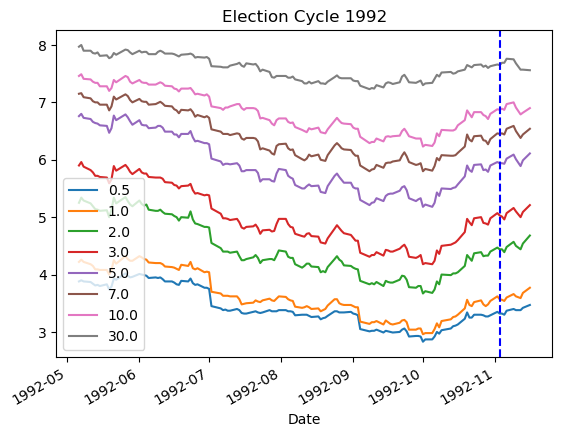

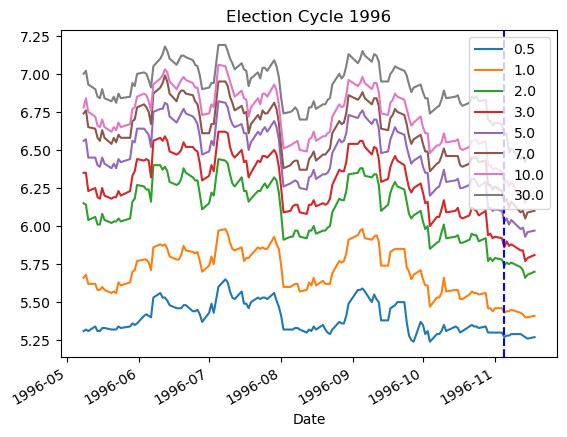

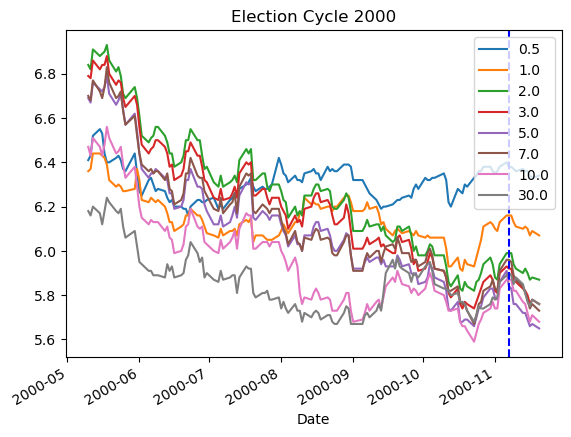

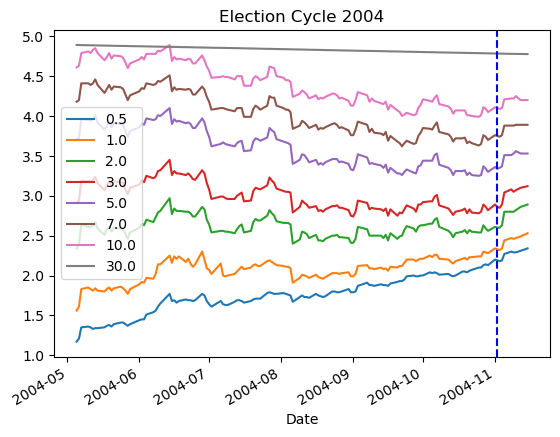

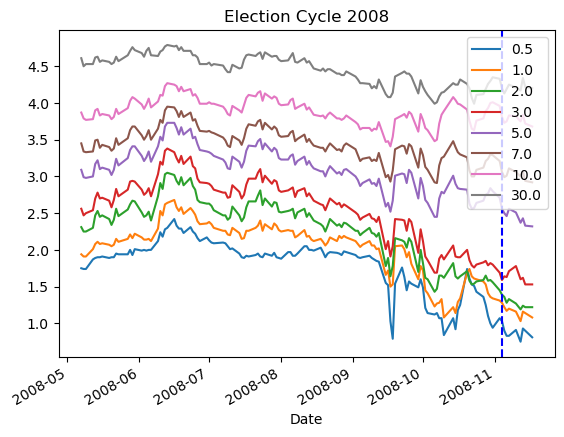

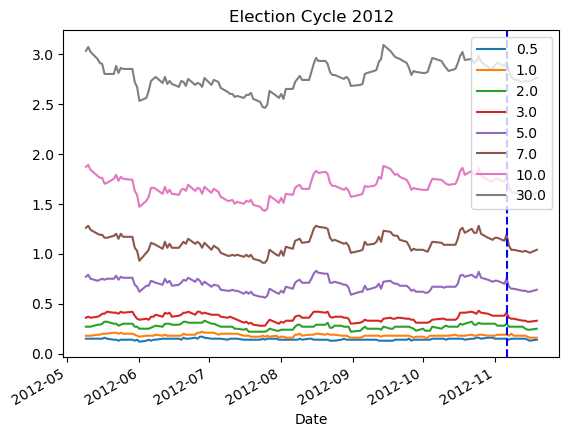

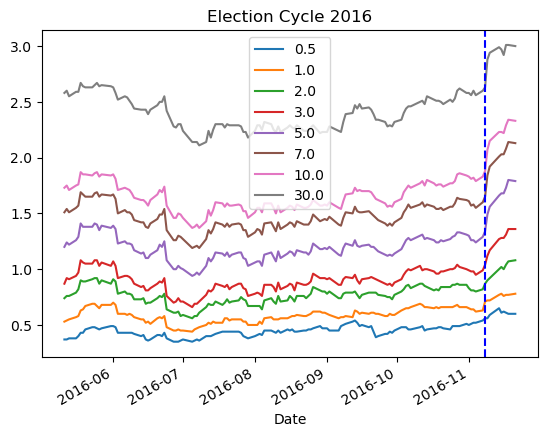

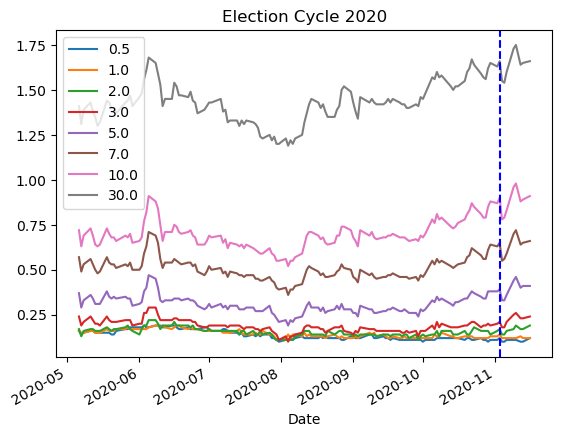

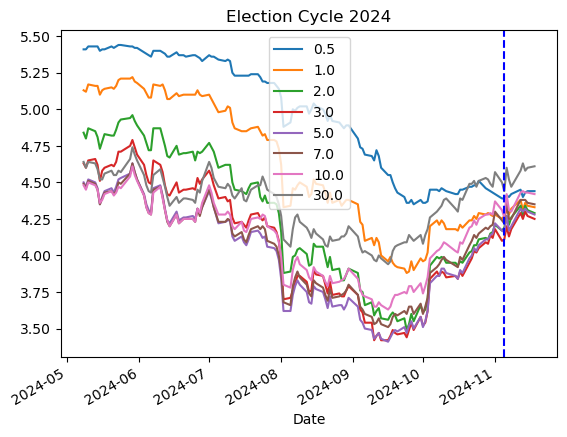

In [8]:
for year in e_year_ranges:
    start_date, end_date = e_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]
    
    new_df.plot()
    plt.title("Election Cycle " + year)
    plt.axvline(election_day(int(year)), color = "b", linestyle = "--")
    plt.show()

In [9]:
T_at_start = FI.Treasuries(df[10][0], 10, issue_date=df.index[0])

/var/folders/49/1jq9sd950fg6397s7sm972380000gn/T/ipykernel_27150/4013301149.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T_at_start = FI.Treasuries(df[10][0], 10, issue_date=df.index[0])


In [10]:
# T_at_start.new_price(df)

In [11]:
T_at_start.cash_flow_dates

0    1992-07-02
1    1992-12-31
2    1993-07-01
3    1993-12-30
4    1994-06-30
5    1994-12-29
6    1995-06-29
7    1995-12-28
8    1996-06-27
9    1996-12-26
10   1997-06-26
11   1997-12-25
12   1998-06-25
13   1998-12-24
14   1999-06-24
15   1999-12-23
16   2000-06-22
17   2000-12-21
18   2001-06-21
19   2001-12-20
dtype: datetime64[ns]

<Axes: >

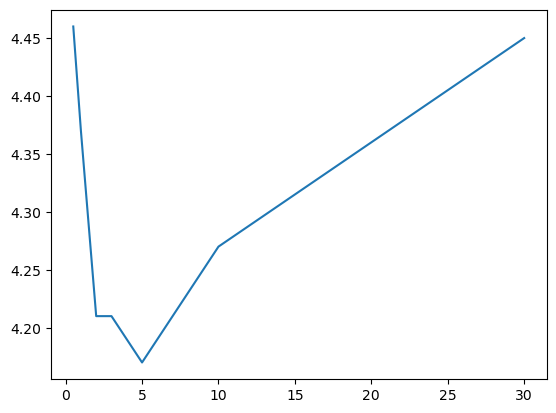

In [12]:
df.iloc[-1,:].plot()

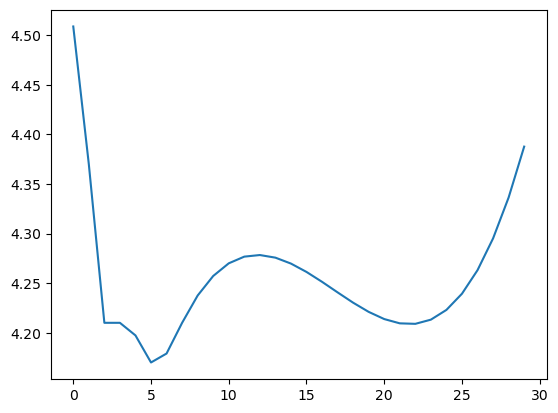

In [13]:
x = np.arange(0,30)

plt.plot(x, T_at_start.interpolated_yield_curve(df.iloc[-1,:], x))

In [14]:
df.iloc[-1,:]

0.5     4.46
1.0     4.37
2.0     4.21
3.0     4.21
5.0     4.17
7.0     4.21
10.0    4.27
30.0    4.45
Name: 2024-11-25 00:00:00, dtype: float64

In [15]:
T_at_start.spot_rates(df.iloc[0,:])

array([0.0401    , 0.0413124 , 0.04451624, 0.0478832 , 0.05003034,
       0.05162577, 0.05364591, 0.05606769, 0.05860223, 0.06094254,
       0.06283233, 0.06429751, 0.06544305, 0.06638102, 0.06721007,
       0.06795149, 0.06860663, 0.06917711, 0.06966482, 0.07007191,
       0.07040084, 0.07065436, 0.07083558, 0.07094794, 0.07099525,
       0.07098169, 0.07091181, 0.07079053, 0.07062312, 0.07041523,
       0.07017281, 0.06990216, 0.06960986, 0.06930278, 0.06898804,
       0.06867304, 0.06836538, 0.06807295, 0.06780387, 0.06756656,
       0.06736978, 0.06722268, 0.06713492, 0.06711679, 0.06717938,
       0.06733483, 0.06759662, 0.06798   , 0.06850255, 0.06918491,
       0.07005188, 0.07113394, 0.07246943, 0.07410791, 0.07611545,
       0.07858323, 0.08164254, 0.08549275, 0.09045839, 0.09712166])

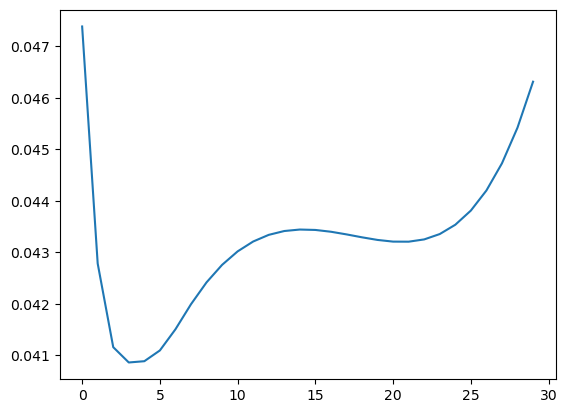

In [16]:
plt.plot(x, T_at_start.interpolated_spot_curve(df.iloc[-20,:], x))

In [17]:
T_at_start.times_till_coupon(df.index[2])

array([ 0.49444444,  1.        ,  1.50555556,  2.01111111,  2.51666667,
        3.02222222,  3.52777778,  4.03333333,  4.53888889,  5.04444444,
        5.55      ,  6.05555556,  6.56111111,  7.06666667,  7.57222222,
        8.07777778,  8.58333333,  9.08888889,  9.59444444, 10.1       ])

In [18]:
T_at_start.issue_date

Timestamp('1992-01-02 00:00:00')

In [19]:
new = FI.Treasuries(df.iloc[0,1], 1, issue_date=df.index[0])

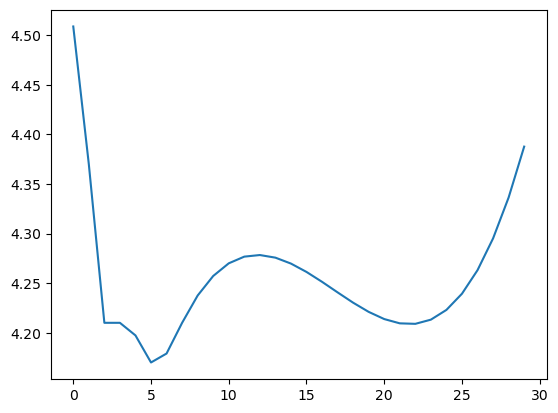

In [20]:
plt.plot(x, new.interpolated_yield_curve(df.iloc[-1,:],x))

<Axes: >

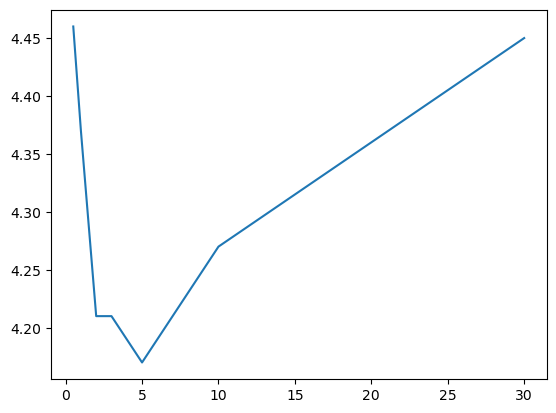

In [21]:
df.iloc[-1,:].plot()

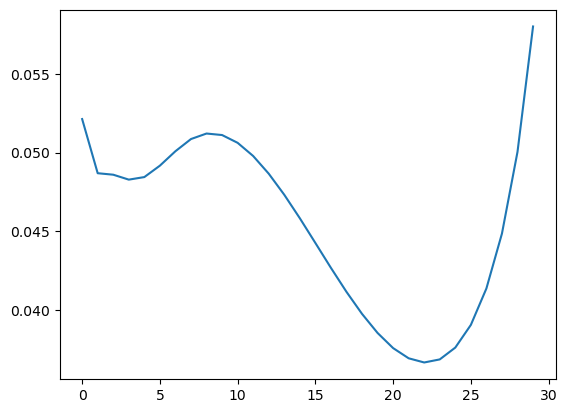

In [22]:
plt.plot(x, new.interpolated_spot_curve(df.iloc[1669, :], x))

In [23]:
for key in ne_1_year_ranges:
    start = ne_1_year_ranges[key][0]
    end = ne_1_year_ranges[key][1]

    cycle = df.loc[start:end]

    print(new.new_price(cycle))
    

Date
1993-05-04    100.0
1993-05-05    100.0
1993-05-06    100.0
1993-05-07    100.0
1993-05-10    100.0
              ...  
1993-11-09    100.0
1993-11-10    100.0
1993-11-12    100.0
1993-11-15    100.0
1993-11-16    100.0
Length: 136, dtype: float64
Date
1997-05-06    100.0
1997-05-07    100.0
1997-05-08    100.0
1997-05-09    100.0
1997-05-12    100.0
              ...  
1997-11-12    100.0
1997-11-13    100.0
1997-11-14    100.0
1997-11-17    100.0
1997-11-18    100.0
Length: 136, dtype: float64
Date
2001-05-08    100.0
2001-05-09    100.0
2001-05-10    100.0
2001-05-11    100.0
2001-05-14    100.0
              ...  
2001-11-14    100.0
2001-11-15    100.0
2001-11-16    100.0
2001-11-19    100.0
2001-11-20    100.0
Length: 134, dtype: float64
Date
2005-05-10    100.0
2005-05-11    100.0
2005-05-12    100.0
2005-05-13    100.0
2005-05-16    100.0
              ...  
2005-11-16    100.0
2005-11-17    100.0
2005-11-18    100.0
2005-11-21    100.0
2005-11-22    100.0
Length: 136, dty

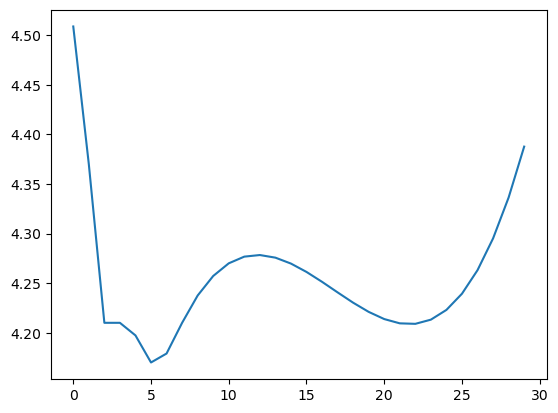

In [24]:
plt.plot(x, new.interpolated_yield_curve(df.iloc[-1,:], x))

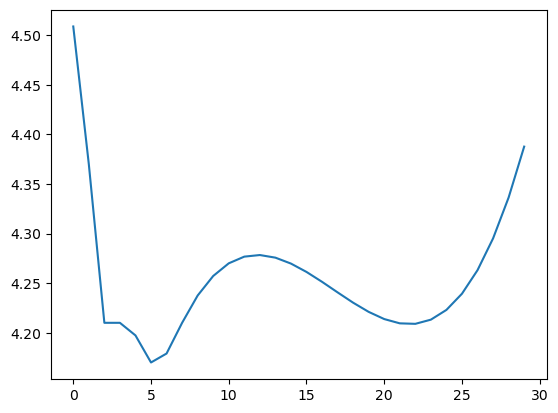

In [25]:
plt.plot(x, new.interpolated_yield_curve(df.iloc[-1,:], x))

In [26]:
df.iloc[-1,:]

0.5     4.46
1.0     4.37
2.0     4.21
3.0     4.21
5.0     4.17
7.0     4.21
10.0    4.27
30.0    4.45
Name: 2024-11-25 00:00:00, dtype: float64

In [27]:
new.spot_rates(df.iloc[-1,:])

array([0.0446    , 0.04369017, 0.04272023, 0.04205945, 0.04194779,
       0.04207507, 0.04207519, 0.0419447 , 0.04177361, 0.04165373,
       0.04165624, 0.04176269, 0.04193127, 0.04211915, 0.04228994,
       0.04243714, 0.04256185, 0.04266514, 0.04274808, 0.04281176,
       0.04285729, 0.04288578, 0.04289841, 0.04289634, 0.0428808 ,
       0.04285304, 0.04281434, 0.04276602, 0.04270945, 0.04264602,
       0.04257716, 0.04250435, 0.04242908, 0.0423529 , 0.04227741,
       0.0422042 , 0.04213495, 0.04207137, 0.04201518, 0.04196819,
       0.04193225, 0.04190924, 0.04190113, 0.04190995, 0.04193781,
       0.04198692, 0.04205958, 0.04215822, 0.0422854 , 0.04244388,
       0.04263658, 0.04286668, 0.04313762, 0.04345317, 0.04381751,
       0.04423529, 0.04471171, 0.04525272, 0.0458651 , 0.0465567 ])

In [28]:
T_at_start.new_price(df)

Date
1992-01-02     99.387572
1992-01-03     98.901970
1992-01-06     99.178602
1992-01-07     99.638681
1992-01-08     99.559195
                 ...    
2024-11-19    100.000000
2024-11-20    100.000000
2024-11-21    100.000000
2024-11-22    100.000000
2024-11-25    100.000000
Length: 8233, dtype: float64

In [29]:
price = T_at_start.new_price(df)

<Axes: xlabel='Date'>

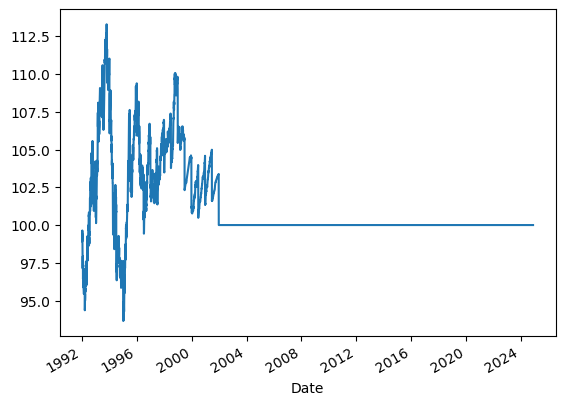

In [30]:
y= f"Price of a bond that is issued at {T_at_start.issue_date} with ytm of {T_at_start.ytm}"

price.plot(y = y)

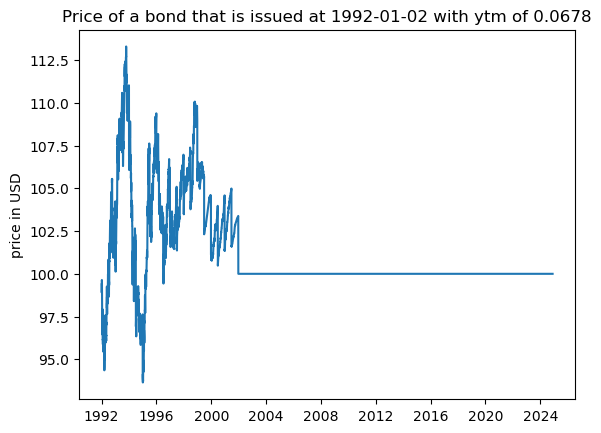

In [31]:
plt.ylabel("price in USD")
plt.title(f"Price of a bond that is issued at {T_at_start.issue_date.date()} with ytm of {T_at_start.ytm}")
plt.plot(price)
plt.show()


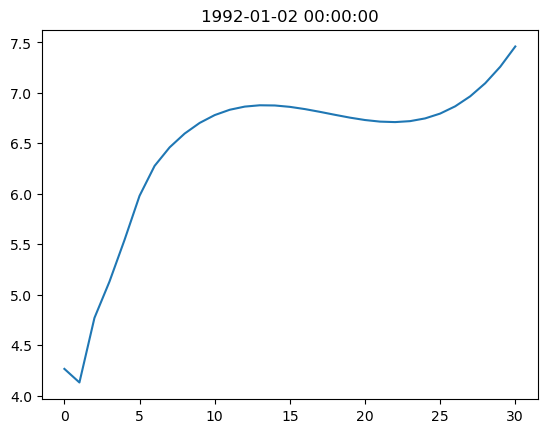

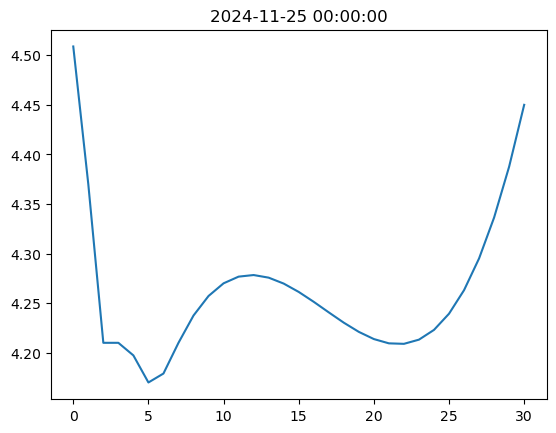

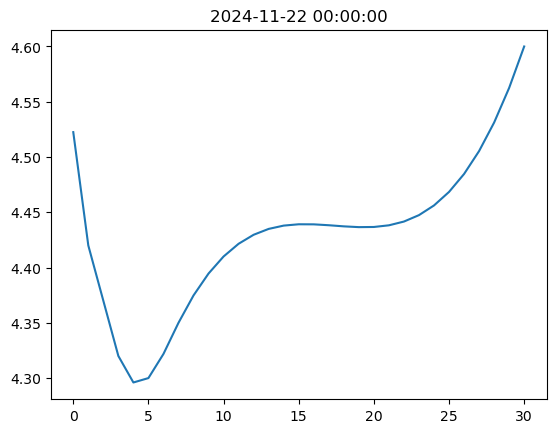

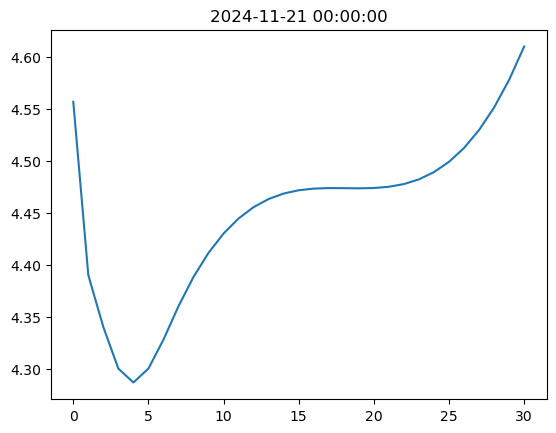

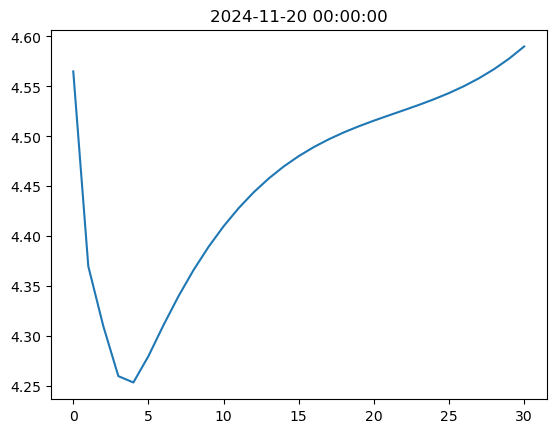

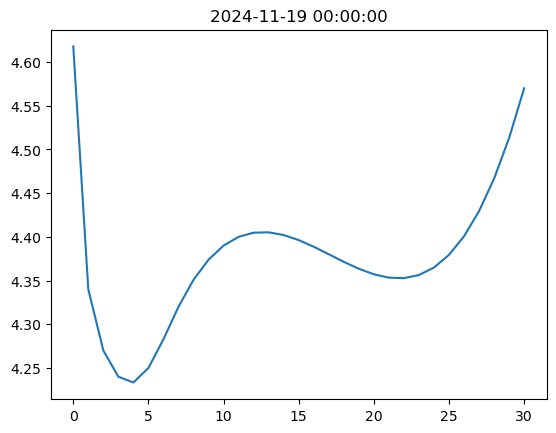

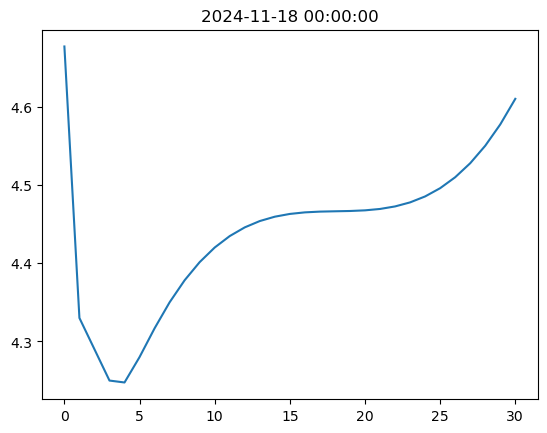

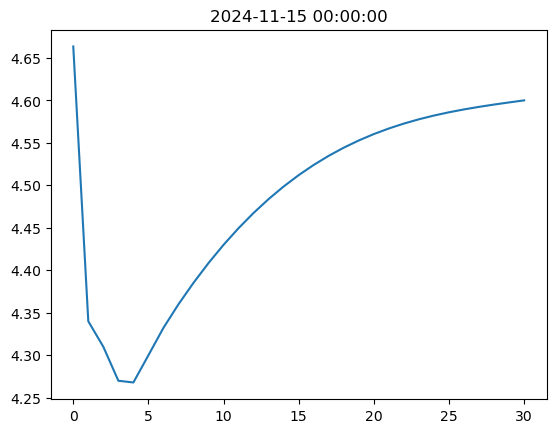

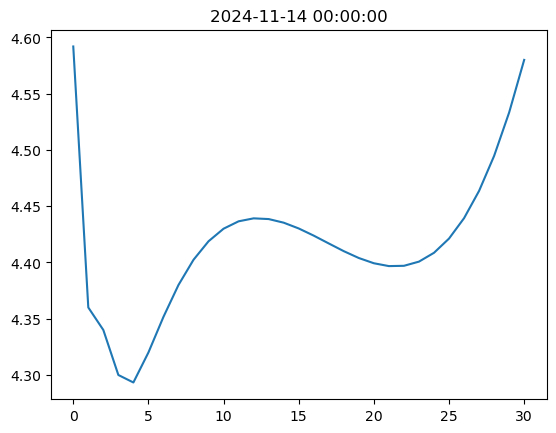

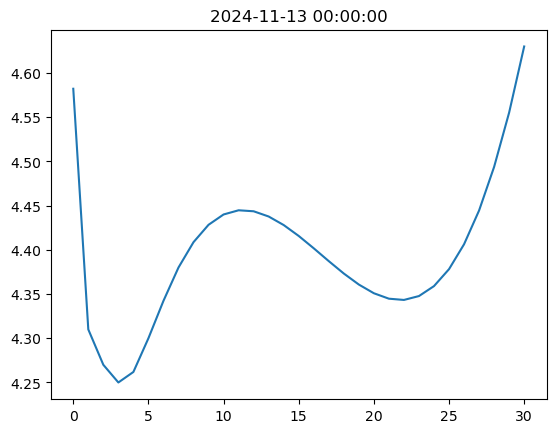

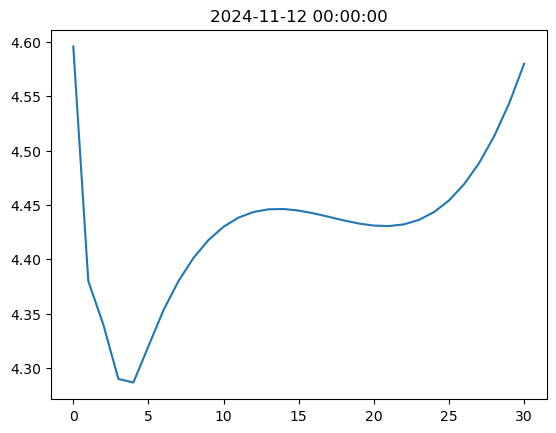

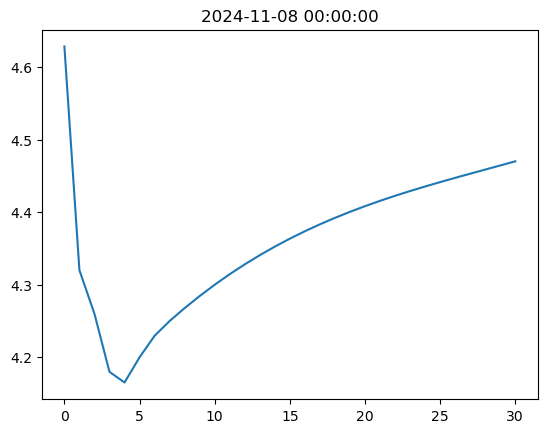

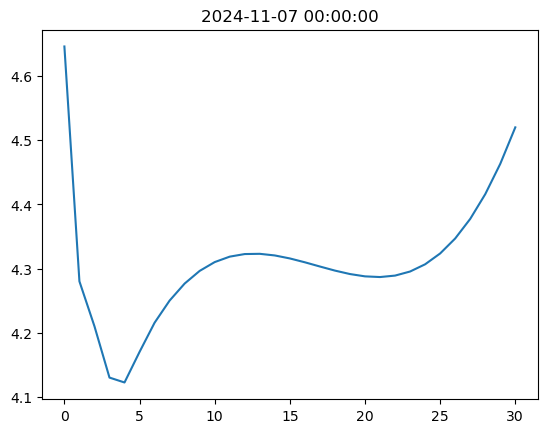

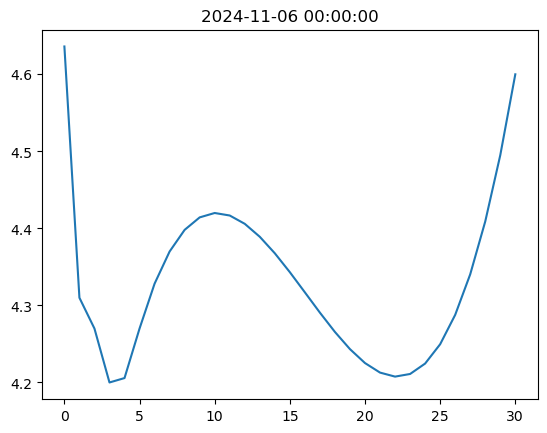

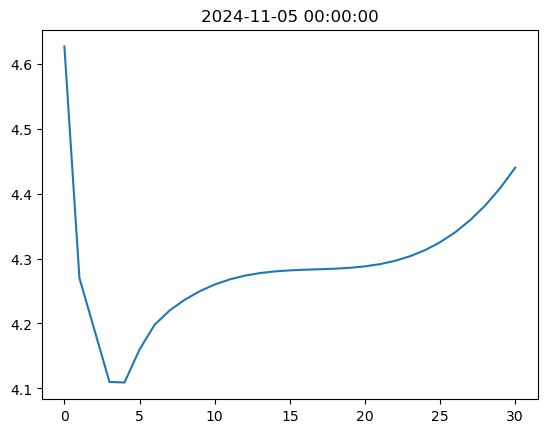

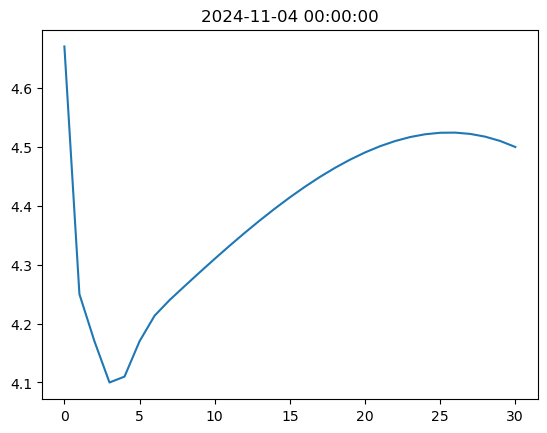

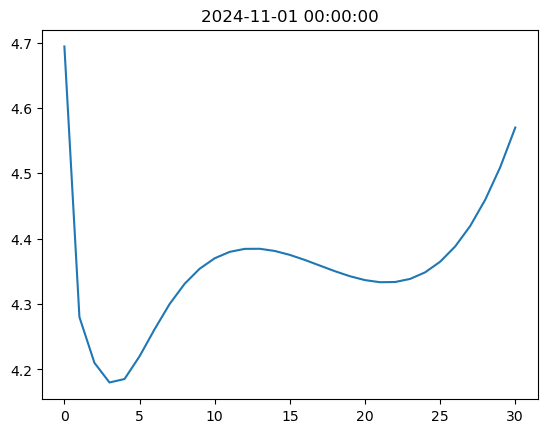

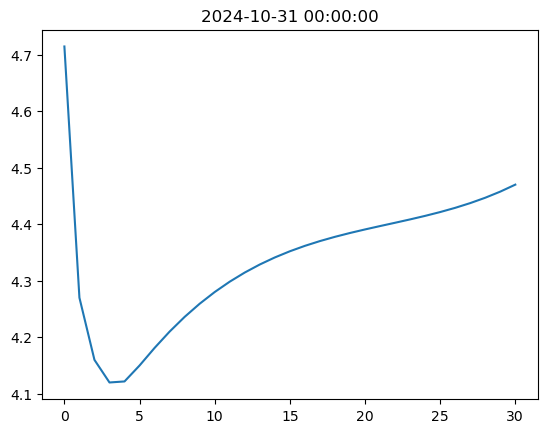

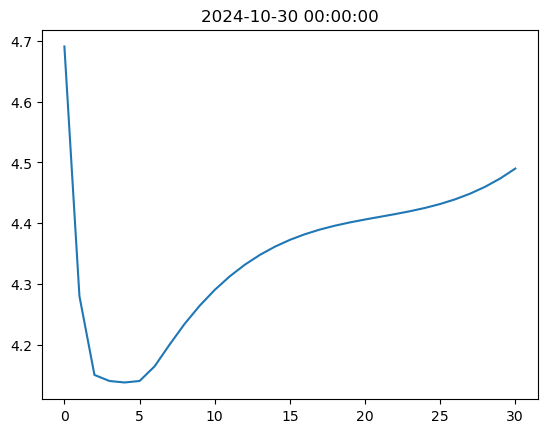

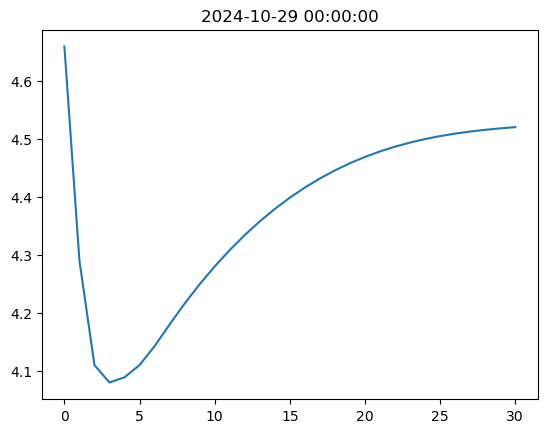

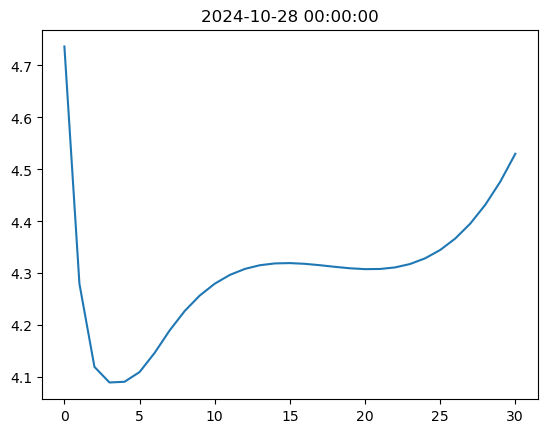

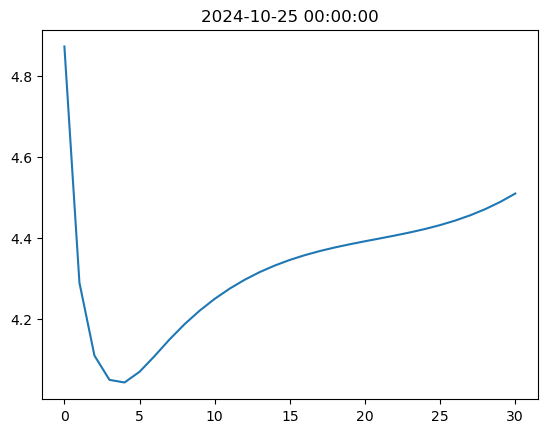

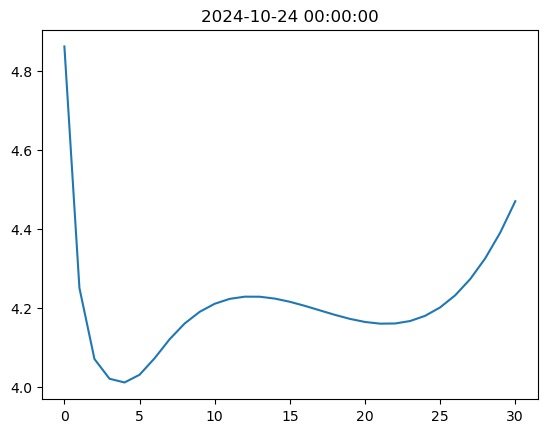

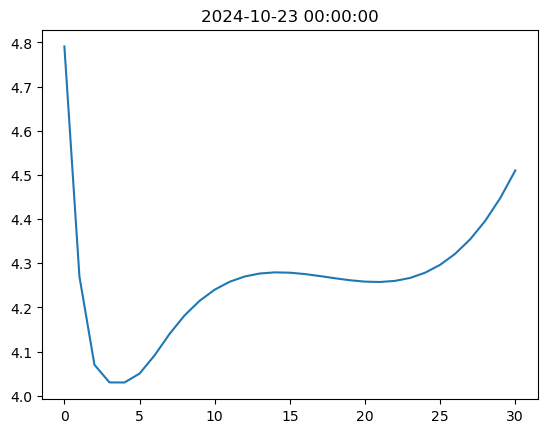

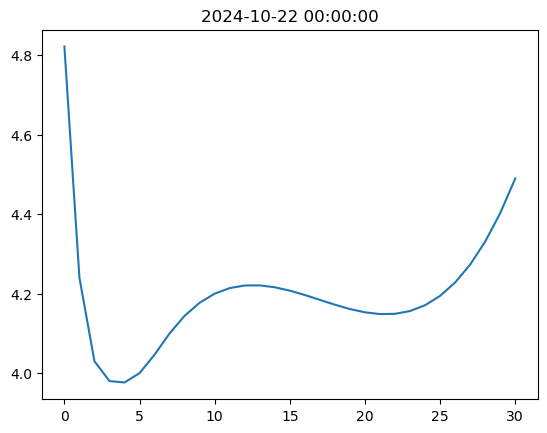

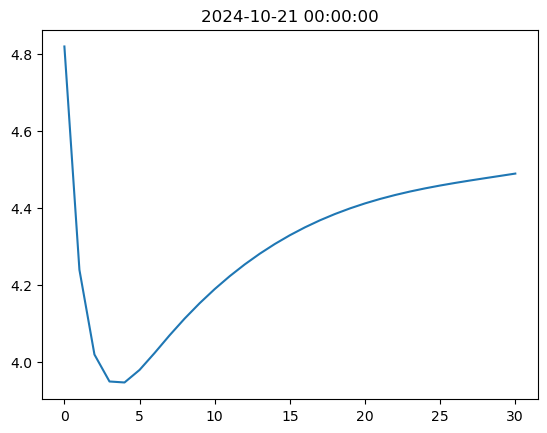

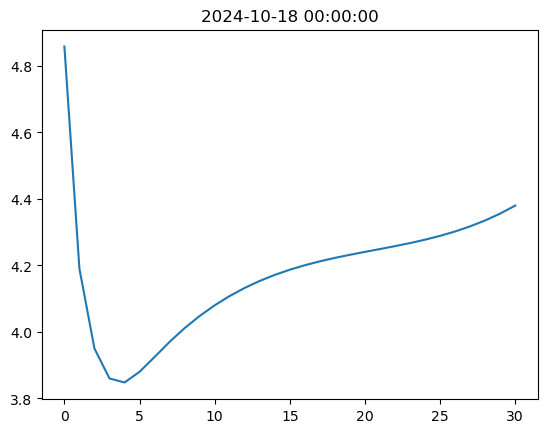

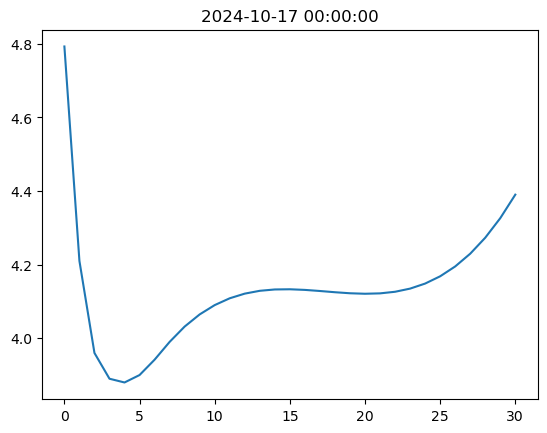

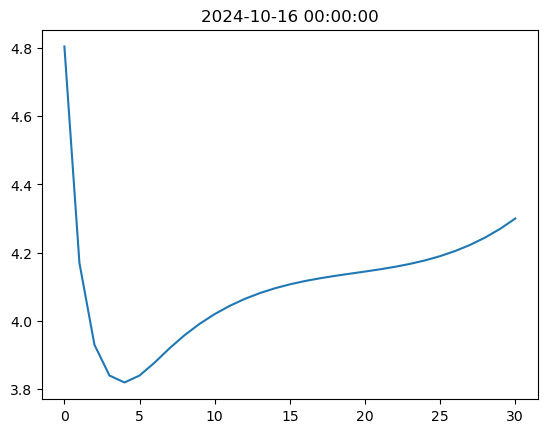

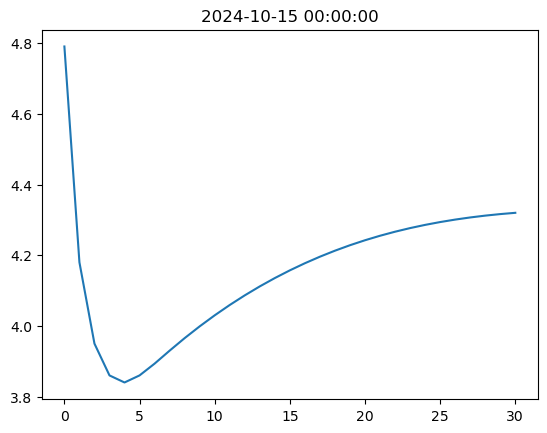

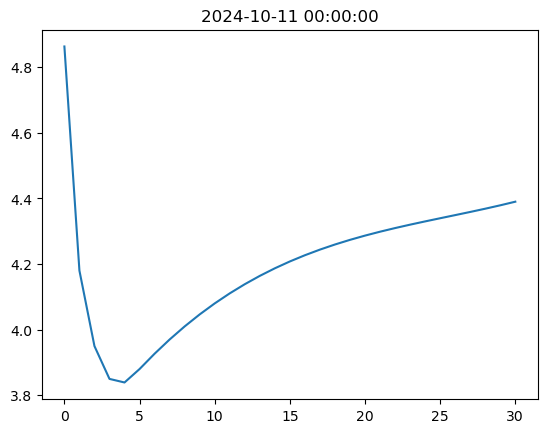

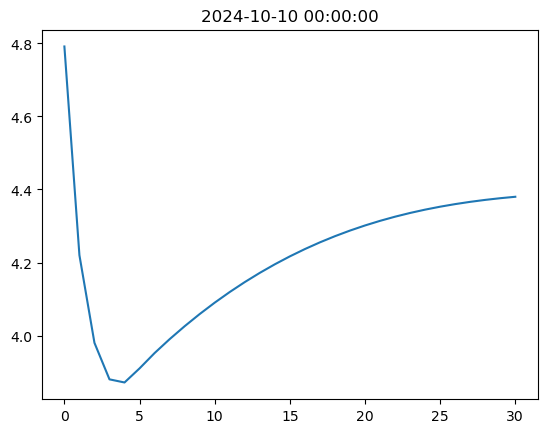

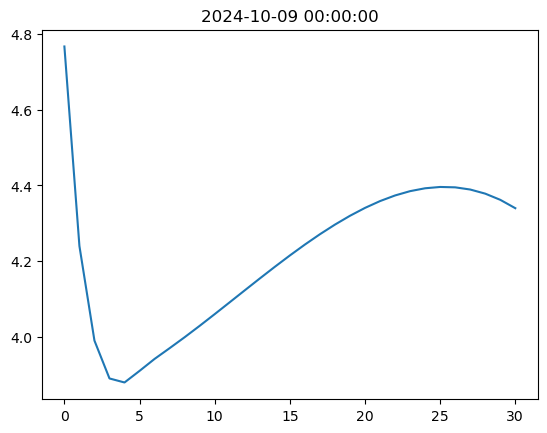

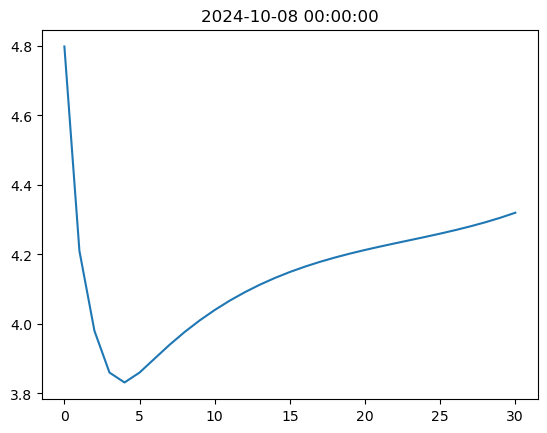

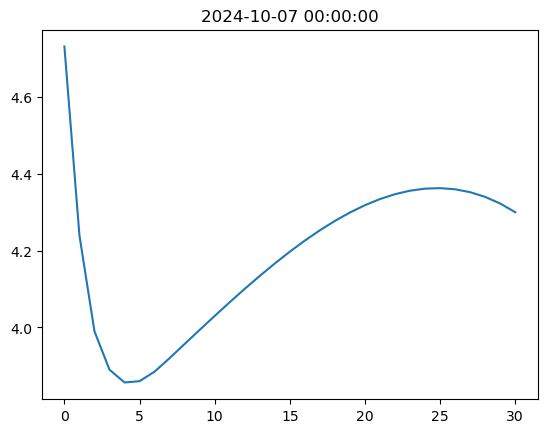

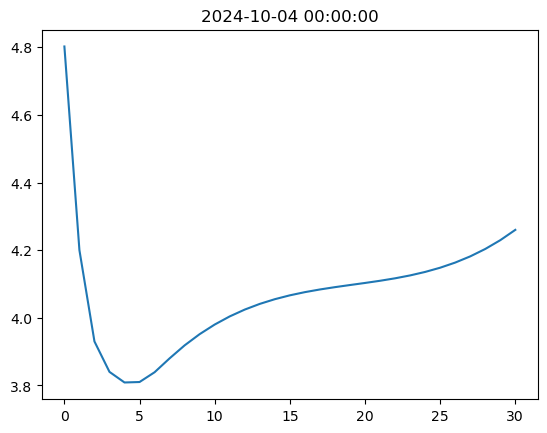

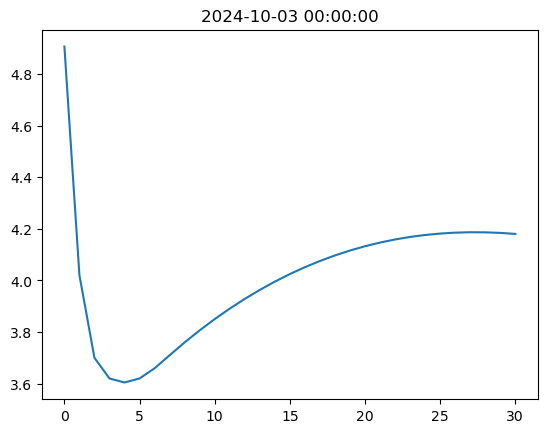

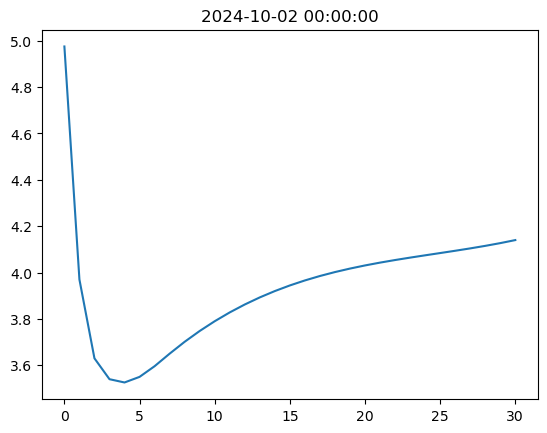

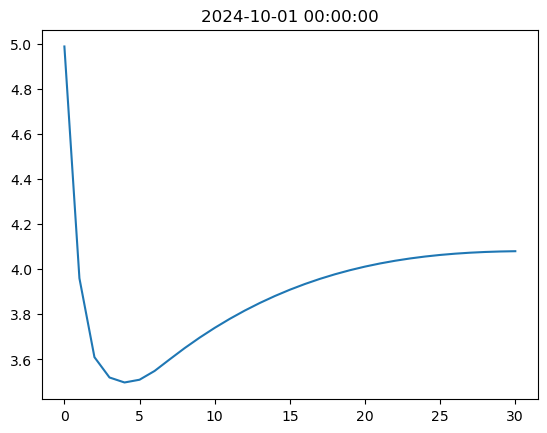

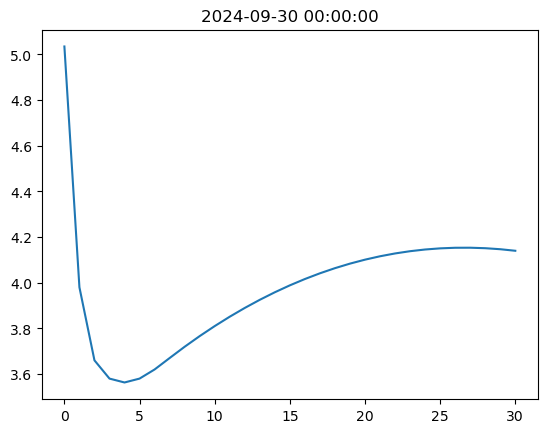

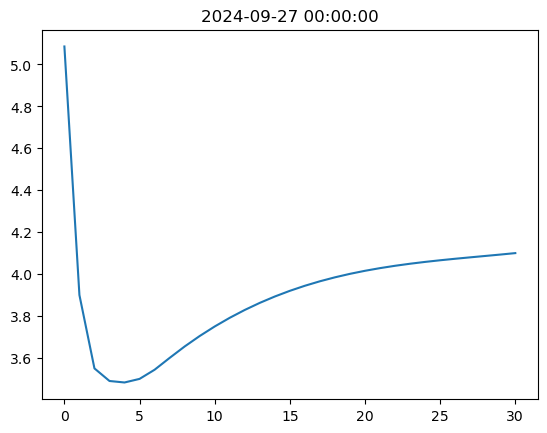

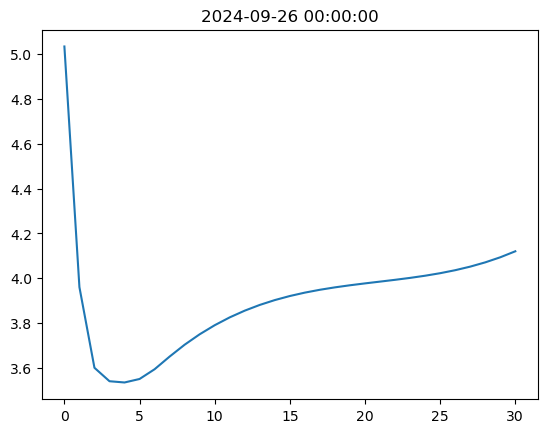

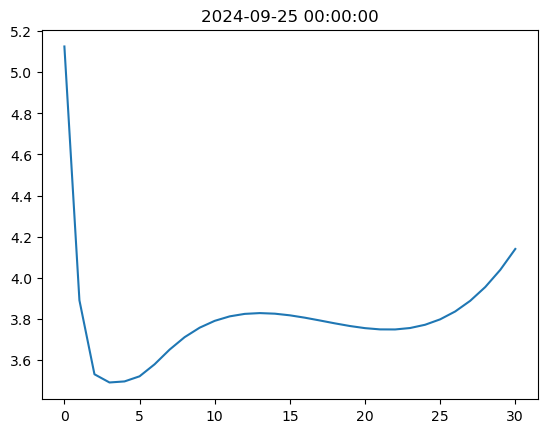

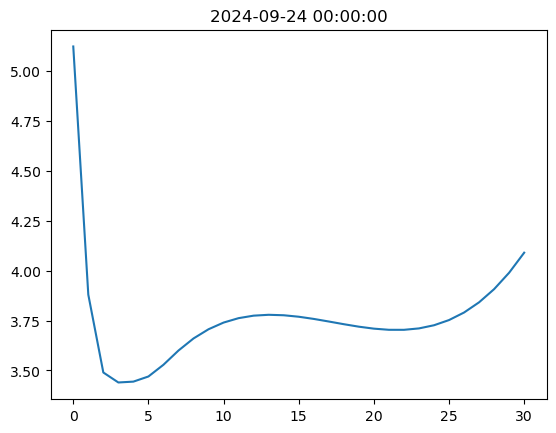

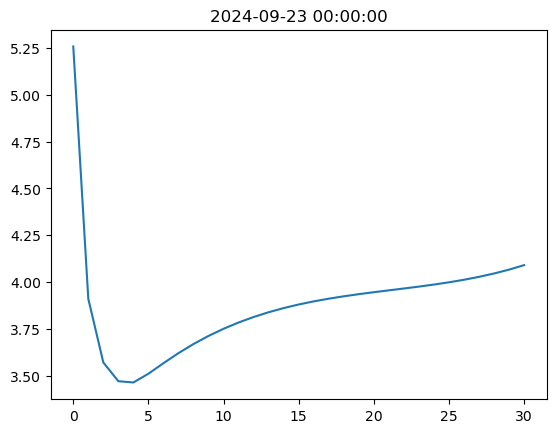

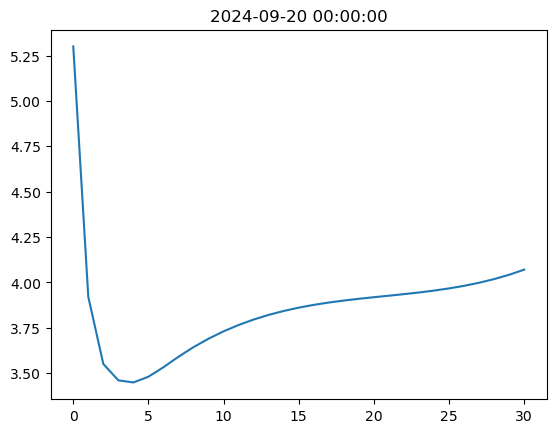

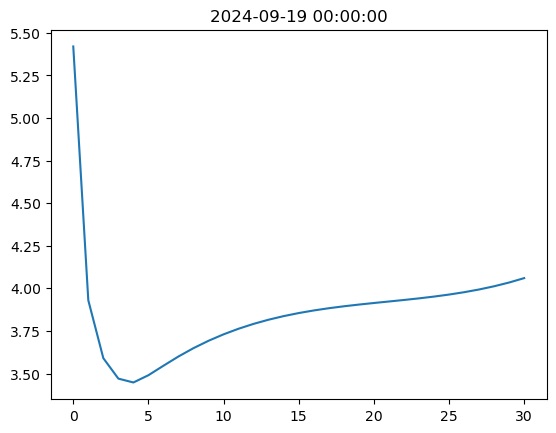

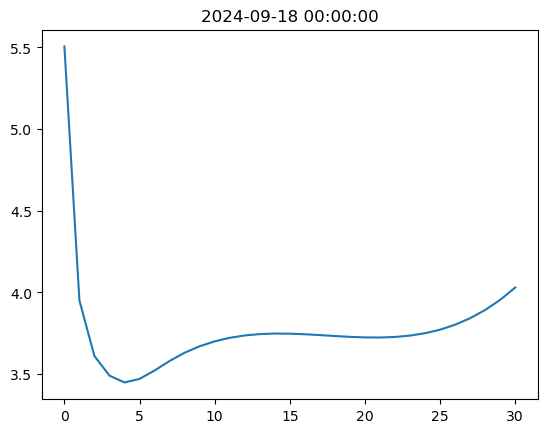

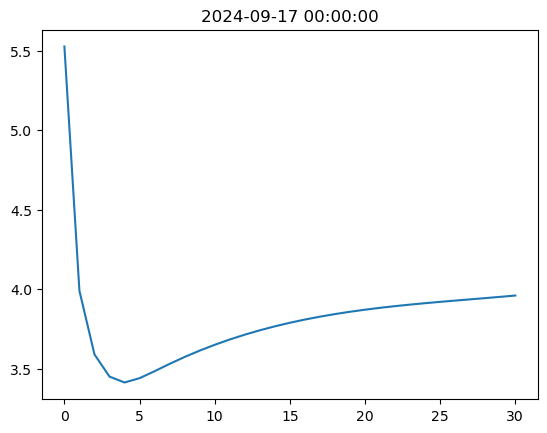

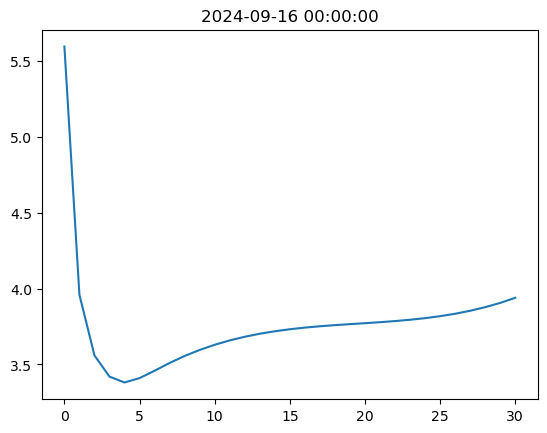

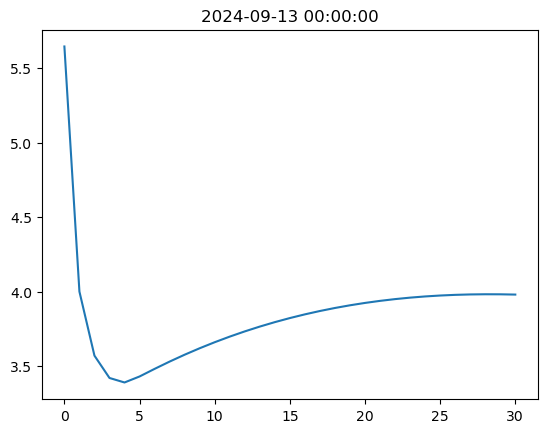

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [44]:
x = np.arange(0, 30.5)

for i in range(len(df.index)):
    plt.plot(x, FI.Treasury(10, df).interpolated_yield_curve(df.iloc[-i,:],x))
    plt.title(df.index[-i])
    plt.show()